## **Product Team Case Study**

Lyfts Problem Toledo Ohio


---




Here’s your current unit economics for each side:

*  **Drivers:**

Customer acquisition cost (CAC) of a new driver is between $400 - $600. CAC is sensitive to the rate of acquisition since channels are only so deep.

At the prevailing wage, drivers have a 5% monthly churn rate and complete 100 rides / month


*  **Riders:**

CAC of a new rider is $10 to $20 (similar to driver CAC it’s sensitive to the rate of acquisition, since existing marketing channels are only so deep)

Each rider requests 1 ride / month on average

Churn is interesting: riders who don’t experience a “failed to find driver” event churn at 10% monthly, but riders who experience one or more “failed to find driver” events churn at 33% monthly




> The core question is: how much more or less do you pay drivers per trip (by changing Lyft’s take)? Your goal is to maximize net revenue for the next 12 months on this route.



In [1]:
import pandas as pd

In [2]:
nombre_hoja = 'GENERAL ANALYSIS'  # Reemplaza 'nombre_de_la_hoja' con el nombre real de la hoja
datos = pd.read_excel("Lyfts Problem Toledo Ohio - Product Team Case Study 1.xlsx", sheet_name=nombre_hoja)


In [3]:
datos.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,MONTH,PRICE PER TRIP,ORIGINAL INCOME LYFTS,NEW INCOME LYFTS,NET INCOME LYFTS,MATCH RATE LINEAL,MATCH RATE INCREASE,MATCH RATE,TOTAL POSSIBLE TRIPS COMPLETED PER RIDER,...,CAC PASSENGER,# PASSENGERS,# PASSENGER CHURN RATE 10%,COST PASSENGER CHURN RATE 10%,# PASSENGERS FAILED TO FIND DRIVER,# PASSENGER CHURN RATE 33%,COST PASSENGER CHURN RATE 33%,COST TOTAL,TOTAL NET INCOME,MAX NET INCOME
2,NaN,1,25,6,6,0,11,0,0.6,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6560,21300.0
3,NaN,2,25,6,5.99,0.01,11,0.11,0.6011,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6660.0,NaN
4,NaN,3,25,6,5.98,0.02,11,0.22,0.6022,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6760,NaN


## **Data Cleaning**

In [4]:
#eliminamos la primer fila
datos = datos.iloc[1:]

In [5]:
datos.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
1,NaN,MONTH,PRICE PER TRIP,ORIGINAL INCOME LYFTS,NEW INCOME LYFTS,NET INCOME LYFTS,MATCH RATE LINEAL,MATCH RATE INCREASE,MATCH RATE,TOTAL POSSIBLE TRIPS COMPLETED PER RIDER,...,CAC PASSENGER,# PASSENGERS,# PASSENGER CHURN RATE 10%,COST PASSENGER CHURN RATE 10%,# PASSENGERS FAILED TO FIND DRIVER,# PASSENGER CHURN RATE 33%,COST PASSENGER CHURN RATE 33%,COST TOTAL,TOTAL NET INCOME,MAX NET INCOME
2,NaN,1,25,6,6,0,11,0,0.6,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6560,21300.0
3,NaN,2,25,6,5.99,0.01,11,0.11,0.6011,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6660.0,NaN
4,NaN,3,25,6,5.98,0.02,11,0.22,0.6022,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6760,NaN
5,NaN,4,25,6,5.97,0.03,11,0.33,0.6033,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6860,NaN


In [6]:
# Actualizamos los nombres de nuestras columnas con los valores de la primer fila
datos.columns = datos.iloc[0]
datos = datos[1:]


In [7]:
datos.head(5)

1,NaN,MONTH,PRICE PER TRIP,ORIGINAL INCOME LYFTS,NEW INCOME LYFTS,NET INCOME LYFTS,MATCH RATE LINEAL,MATCH RATE INCREASE,MATCH RATE,TOTAL POSSIBLE TRIPS COMPLETED PER RIDER,...,CAC PASSENGER,# PASSENGERS,# PASSENGER CHURN RATE 10%,COST PASSENGER CHURN RATE 10%,# PASSENGERS FAILED TO FIND DRIVER,# PASSENGER CHURN RATE 33%,COST PASSENGER CHURN RATE 33%,COST TOTAL,TOTAL NET INCOME,MAX NET INCOME
2,NaN,1,25,6,6,0,11,0,0.6,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6560,21300.0
3,NaN,2,25,6,5.99,0.01,11,0.11,0.6011,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6660.0,NaN
4,NaN,3,25,6,5.98,0.02,11,0.22,0.6022,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6760,NaN
5,NaN,4,25,6,5.97,0.03,11,0.33,0.6033,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6860,NaN
6,NaN,5,25,6,5.96,0.04,11,0.44,0.6044,166,...,20,10000,1000,20000,6600,2178,43560,66560,-6960,NaN


In [8]:
# Eliminamos la primer columna
datos = datos.iloc[:, 1:]
datos.head(5)

1,MONTH,PRICE PER TRIP,ORIGINAL INCOME LYFTS,NEW INCOME LYFTS,NET INCOME LYFTS,MATCH RATE LINEAL,MATCH RATE INCREASE,MATCH RATE,TOTAL POSSIBLE TRIPS COMPLETED PER RIDER,TOTAL TRIPS COMPLETED PER RIDER,...,CAC PASSENGER,# PASSENGERS,# PASSENGER CHURN RATE 10%,COST PASSENGER CHURN RATE 10%,# PASSENGERS FAILED TO FIND DRIVER,# PASSENGER CHURN RATE 33%,COST PASSENGER CHURN RATE 33%,COST TOTAL,TOTAL NET INCOME,MAX NET INCOME
2,1,25,6,6,0,11,0,0.6,166,100,...,20,10000,1000,20000,6600,2178,43560,66560,-6560,21300.0
3,2,25,6,5.99,0.01,11,0.11,0.6011,166,100,...,20,10000,1000,20000,6600,2178,43560,66560,-6660.0,NaN
4,3,25,6,5.98,0.02,11,0.22,0.6022,166,100,...,20,10000,1000,20000,6600,2178,43560,66560,-6760,NaN
5,4,25,6,5.97,0.03,11,0.33,0.6033,166,100,...,20,10000,1000,20000,6600,2178,43560,66560,-6860,NaN
6,5,25,6,5.96,0.04,11,0.44,0.6044,166,100,...,20,10000,1000,20000,6600,2178,43560,66560,-6960,NaN


In [9]:
# eliminamos la ultima columna
datos = datos.iloc[:, :-1]
datos.head(5)

1,MONTH,PRICE PER TRIP,ORIGINAL INCOME LYFTS,NEW INCOME LYFTS,NET INCOME LYFTS,MATCH RATE LINEAL,MATCH RATE INCREASE,MATCH RATE,TOTAL POSSIBLE TRIPS COMPLETED PER RIDER,TOTAL TRIPS COMPLETED PER RIDER,...,COST CAC DRIVER,CAC PASSENGER,# PASSENGERS,# PASSENGER CHURN RATE 10%,COST PASSENGER CHURN RATE 10%,# PASSENGERS FAILED TO FIND DRIVER,# PASSENGER CHURN RATE 33%,COST PASSENGER CHURN RATE 33%,COST TOTAL,TOTAL NET INCOME
2,1,25,6,6,0,11,0,0.6,166,100,...,3000,20,10000,1000,20000,6600,2178,43560,66560,-6560
3,2,25,6,5.99,0.01,11,0.11,0.6011,166,100,...,3000,20,10000,1000,20000,6600,2178,43560,66560,-6660.0
4,3,25,6,5.98,0.02,11,0.22,0.6022,166,100,...,3000,20,10000,1000,20000,6600,2178,43560,66560,-6760
5,4,25,6,5.97,0.03,11,0.33,0.6033,166,100,...,3000,20,10000,1000,20000,6600,2178,43560,66560,-6860
6,5,25,6,5.96,0.04,11,0.44,0.6044,166,100,...,3000,20,10000,1000,20000,6600,2178,43560,66560,-6960


## **Data Analysis**


In [10]:
tipos_dato = datos.dtypes
print(tipos_dato)

1
MONTH                                        object
PRICE PER TRIP                               object
ORIGINAL INCOME LYFTS                        object
NEW INCOME LYFTS                             object
NET INCOME LYFTS                             object
MATCH RATE LINEAL                            object
MATCH RATE INCREASE                          object
MATCH RATE                                   object
TOTAL POSSIBLE TRIPS COMPLETED PER RIDER     object
TOTAL TRIPS COMPLETED PER RIDER              object
MONTHLY EARNINGS PER RIDER                   object
NET INCOME 1                                 object
DRIVER WAGE                                  object
MONTHLY COST (Driver Payout)                 object
NET INCOME 2                                 object
MAX NET INCOME                               object
NaN                                         float64
NaN                                         float64
NaN                                         float64
# OF DRIVE

In [11]:
# Convertimos el tipo de datos a númerico
datos = datos.apply(pd.to_numeric, errors='coerce')
tipos_dato = datos.dtypes
print(tipos_dato)

1
MONTH                                         int64
PRICE PER TRIP                                int64
ORIGINAL INCOME LYFTS                         int64
NEW INCOME LYFTS                            float64
NET INCOME LYFTS                            float64
MATCH RATE LINEAL                             int64
MATCH RATE INCREASE                         float64
MATCH RATE                                  float64
TOTAL POSSIBLE TRIPS COMPLETED PER RIDER      int64
TOTAL TRIPS COMPLETED PER RIDER               int64
MONTHLY EARNINGS PER RIDER                    int64
NET INCOME 1                                float64
DRIVER WAGE                                 float64
MONTHLY COST (Driver Payout)                float64
NET INCOME 2                                float64
MAX NET INCOME                              float64
NaN                                         float64
NaN                                         float64
NaN                                         float64
# OF DRIVE

In [12]:
datos.head(5)

1,MONTH,PRICE PER TRIP,ORIGINAL INCOME LYFTS,NEW INCOME LYFTS,NET INCOME LYFTS,MATCH RATE LINEAL,MATCH RATE INCREASE,MATCH RATE,TOTAL POSSIBLE TRIPS COMPLETED PER RIDER,TOTAL TRIPS COMPLETED PER RIDER,...,COST CAC DRIVER,CAC PASSENGER,# PASSENGERS,# PASSENGER CHURN RATE 10%,COST PASSENGER CHURN RATE 10%,# PASSENGERS FAILED TO FIND DRIVER,# PASSENGER CHURN RATE 33%,COST PASSENGER CHURN RATE 33%,COST TOTAL,TOTAL NET INCOME
2,1,25,6,6.00,0.00,11,0.00,0.6000,166,100,...,3000,20.0,10000,1000,20000,6600,2178,43560.0,66560.0,-6560.0
3,2,25,6,5.99,0.01,11,0.11,0.6011,166,100,...,3000,20.0,10000,1000,20000,6600,2178,43560.0,66560.0,-6660.0
4,3,25,6,5.98,0.02,11,0.22,0.6022,166,100,...,3000,20.0,10000,1000,20000,6600,2178,43560.0,66560.0,-6760.0
5,4,25,6,5.97,0.03,11,0.33,0.6033,166,100,...,3000,20.0,10000,1000,20000,6600,2178,43560.0,66560.0,-6860.0
6,5,25,6,5.96,0.04,11,0.44,0.6044,166,100,...,3000,20.0,10000,1000,20000,6600,2178,43560.0,66560.0,-6960.0


In [13]:
nombres_columnas = list(datos.columns)
print(nombres_columnas)

['MONTH', 'PRICE PER TRIP', 'ORIGINAL INCOME LYFTS ', 'NEW INCOME LYFTS', 'NET INCOME LYFTS', 'MATCH RATE LINEAL', 'MATCH RATE INCREASE', 'MATCH RATE', 'TOTAL POSSIBLE TRIPS COMPLETED PER RIDER', 'TOTAL TRIPS COMPLETED PER RIDER', 'MONTHLY EARNINGS PER RIDER', 'NET INCOME 1', 'DRIVER WAGE', 'MONTHLY COST (Driver Payout)', 'NET INCOME 2', 'MAX NET INCOME', nan, nan, nan, '# OF DRIVERS', 'TOTAL TRIPS COMPLETED', 'MONTHLY EARNINGS TOTAL', 'MONTHLY COST (Driver Payout)', 'TOTAL NET INCOME B', 'MAX NET INCOME', nan, 'CAC DRIVER', '# DRIVER CHURN RATE', 'COST CAC DRIVER', 'CAC PASSENGER', '# PASSENGERS', '# PASSENGER CHURN RATE 10%', 'COST PASSENGER CHURN RATE 10%', '# PASSENGERS FAILED TO FIND DRIVER', '# PASSENGER CHURN RATE 33%', 'COST PASSENGER CHURN RATE 33%', 'COST TOTAL', 'TOTAL NET INCOME']


In [14]:
#Eliminamos las columnas nan
datos = datos.dropna(axis=1, how='all')

# Volvemos a imprimir nuestras columnas
nombres_columnas = list(datos.columns)
print(nombres_columnas)
print(len(nombres_columnas))

['MONTH', 'PRICE PER TRIP', 'ORIGINAL INCOME LYFTS ', 'NEW INCOME LYFTS', 'NET INCOME LYFTS', 'MATCH RATE LINEAL', 'MATCH RATE INCREASE', 'MATCH RATE', 'TOTAL POSSIBLE TRIPS COMPLETED PER RIDER', 'TOTAL TRIPS COMPLETED PER RIDER', 'MONTHLY EARNINGS PER RIDER', 'NET INCOME 1', 'DRIVER WAGE', 'MONTHLY COST (Driver Payout)', 'NET INCOME 2', 'MAX NET INCOME', '# OF DRIVERS', 'TOTAL TRIPS COMPLETED', 'MONTHLY EARNINGS TOTAL', 'MONTHLY COST (Driver Payout)', 'TOTAL NET INCOME B', 'MAX NET INCOME', 'CAC DRIVER', '# DRIVER CHURN RATE', 'COST CAC DRIVER', 'CAC PASSENGER', '# PASSENGERS', '# PASSENGER CHURN RATE 10%', 'COST PASSENGER CHURN RATE 10%', '# PASSENGERS FAILED TO FIND DRIVER', '# PASSENGER CHURN RATE 33%', 'COST PASSENGER CHURN RATE 33%', 'COST TOTAL', 'TOTAL NET INCOME']
34


## **We calculated the correlation between all variables.**



> The correlation is being used to assess the strength and direction of the linear relationship between two variables in the given code. It measures how closely the values of two variables move together. The correlation coefficient can range from -1 to 1. A value of 1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable increases proportionally. Conversely, a value of -1 indicates a perfect negative correlation, where one variable increases as the other variable decreases. A correlation value close to 0 suggests a weak or no linear relationship between the variables.



In [15]:
correlacion = datos.corr()
print(correlacion)

1                                            MONTH  PRICE PER TRIP  \
1                                                                    
MONTH                                     1.000000             NaN   
PRICE PER TRIP                                 NaN             NaN   
ORIGINAL INCOME LYFTS                          NaN             NaN   
NEW INCOME LYFTS                         -1.000000             NaN   
NET INCOME LYFTS                          1.000000             NaN   
MATCH RATE LINEAL                              NaN             NaN   
MATCH RATE INCREASE                       1.000000             NaN   
MATCH RATE                                1.000000             NaN   
TOTAL POSSIBLE TRIPS COMPLETED PER RIDER       NaN             NaN   
TOTAL TRIPS COMPLETED PER RIDER           0.999951             NaN   
MONTHLY EARNINGS PER RIDER                0.999951             NaN   
NET INCOME 1                             -0.961210             NaN   
DRIVER WAGE         

In [16]:
from tabulate import tabulate

tabla_correlaciones = []

for columna1 in correlacion.columns:
    for columna2, valor in correlacion[columna1].iteritems():
        if columna1 != columna2 and not pd.isnull(valor):
            tabla_correlaciones.append([f"Correlación de valor {valor:.2f}", columna1, columna2])

print(tabulate(tabla_correlaciones, headers=["Correlación", "Columna A", "Columna B"], tablefmt="grid"))


+----------------------------+------------------------------------+------------------------------------+
| Correlación                | Columna A                          | Columna B                          |
+============================+====================================+====================================+
| Correlación de valor -1.00 | MONTH                              | NEW INCOME LYFTS                   |
+----------------------------+------------------------------------+------------------------------------+
| Correlación de valor 1.00  | MONTH                              | NET INCOME LYFTS                   |
+----------------------------+------------------------------------+------------------------------------+
| Correlación de valor 1.00  | MONTH                              | MATCH RATE INCREASE                |
+----------------------------+------------------------------------+------------------------------------+
| Correlación de valor 1.00  | MONTH                   

<ipython-input-16-df1ac8c3f492>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for columna2, valor in correlacion[columna1].iteritems():


## **We generated a heatmap of the correlations.**



We created a heatmap of correlations using seaborn and matplotlib. The heatmap visually represents the strength and direction of the correlations between variables. The code sets a threshold for the desired correlation level, applies it to the correlation matrix, and visualizes the result. The heatmap is saved as a PNG image for further use.










<ipython-input-17-8514f6bb2ca3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlacion_thresh[columna][columna] = np.nan


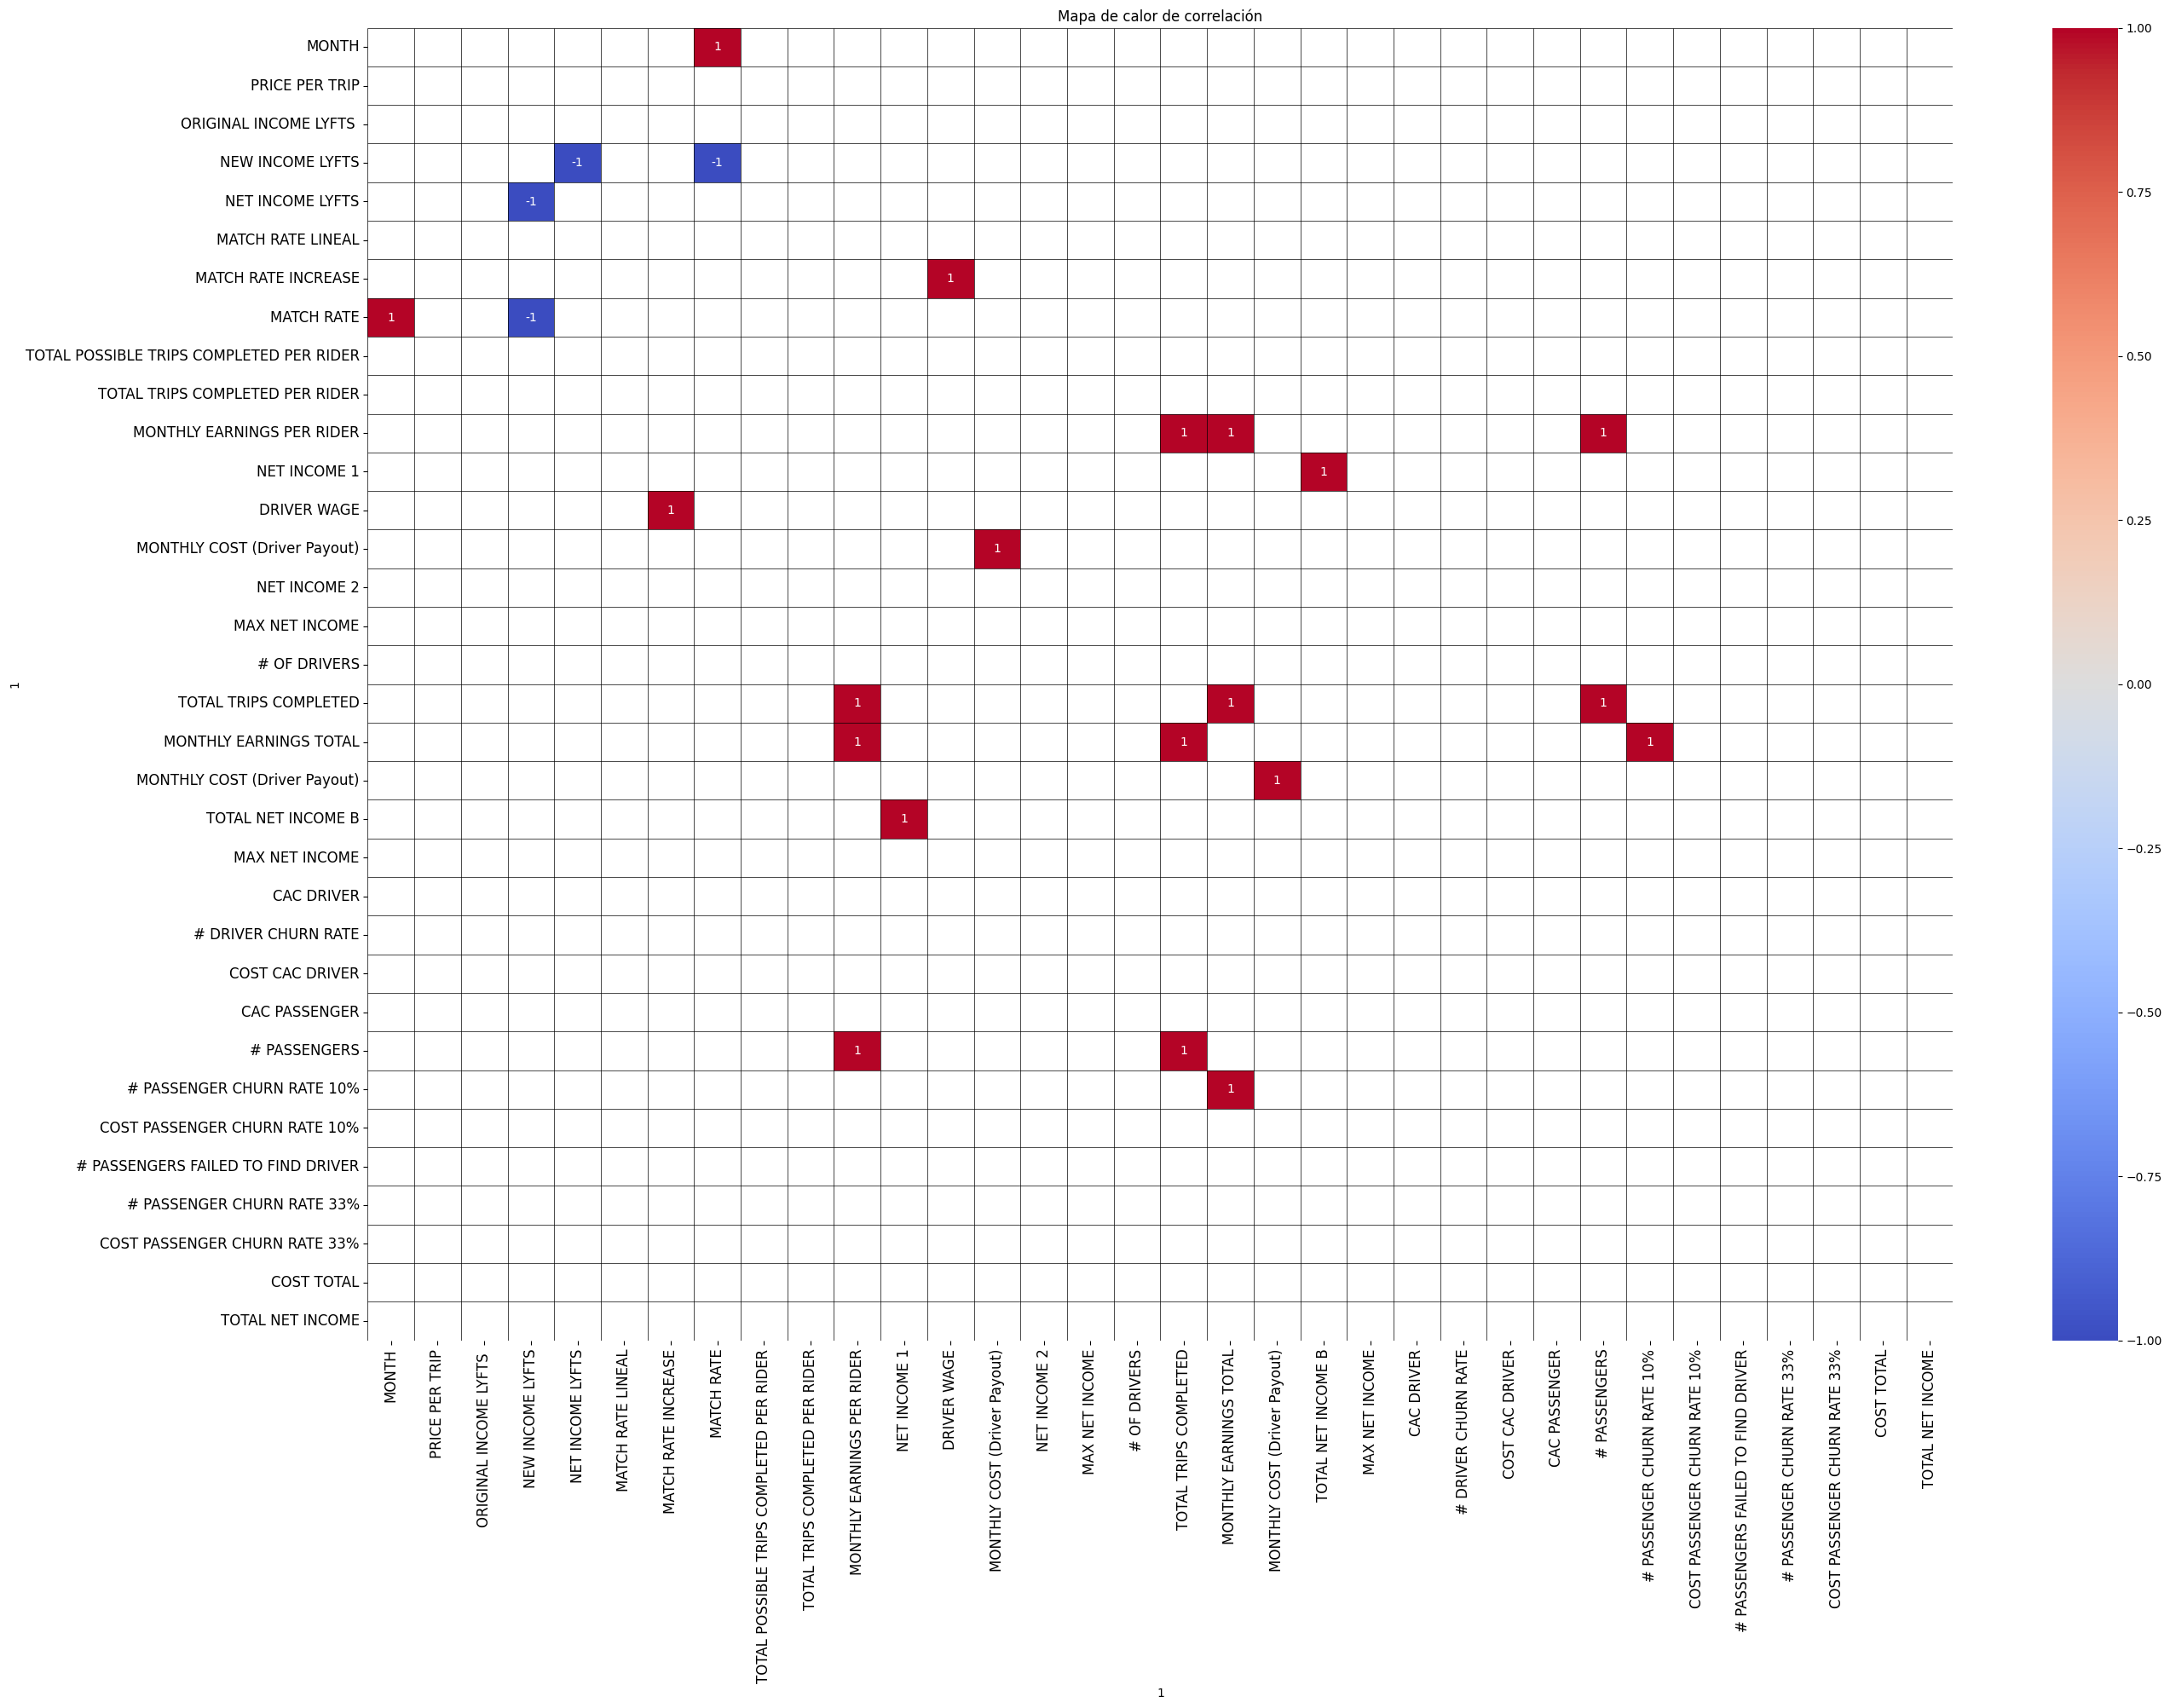

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


threshold = 0.99  # Establece el umbral deseado

# Aplica el umbral a la matriz de correlación
correlacion_thresh = correlacion[(correlacion == 1) | (correlacion == -1)]

# Reemplaza los valores de correlación entre columnas con el mismo nombre con NaN
for columna in correlacion.columns:
    correlacion_thresh[columna][columna] = np.nan

fig, ax = plt.subplots(figsize=(30, 20))  # Ajusta el tamaño de la figura según tus preferencias

sns.heatmap(correlacion_thresh, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0, ax=ax)

plt.hlines(range(len(correlacion)), 0, len(correlacion), colors='black', linewidths=0.5)
plt.vlines(range(len(correlacion)), 0, len(correlacion), colors='black', linewidths=0.5)
plt.xticks(fontsize=12)  # Ajusta el tamaño de las etiquetas según tus preferencias
plt.yticks(fontsize=12)
plt.title("Mapa de calor de correlación")
# Guarda el mapa de calor como una imagen PNG
plt.savefig('mapa_de_calor.png', format='png', dpi=500)
plt.show()


In [18]:
# MATCH RATE
correlation = datos.corr()
print(correlation["MATCH RATE"].sort_values(ascending=False))

1
DRIVER WAGE                                 1.000000
NET INCOME LYFTS                            1.000000
MONTH                                       1.000000
MATCH RATE                                  1.000000
MATCH RATE INCREASE                         1.000000
MONTHLY EARNINGS TOTAL                      0.999951
TOTAL TRIPS COMPLETED PER RIDER             0.999951
TOTAL TRIPS COMPLETED                       0.999951
MONTHLY EARNINGS PER RIDER                  0.999951
# PASSENGER CHURN RATE 10%                  0.999951
# PASSENGERS                                0.999951
MONTHLY COST (Driver Payout)                0.998842
MONTHLY COST (Driver Payout)                0.998842
TOTAL NET INCOME                            0.371740
COST PASSENGER CHURN RATE 10%              -0.682231
TOTAL NET INCOME B                         -0.961210
NET INCOME 1                               -0.961210
NET INCOME 2                               -0.961210
COST CAC DRIVER                            -

In [29]:
#DRIVER WAGE
correlation = datos.corr()
print("DRIVER WAGE CORRELATION\n")
print(correlation["DRIVER WAGE"].sort_values(ascending=False))

DRIVER WAGE CORRELATION

1
MONTH                                       1.000000
NET INCOME LYFTS                            1.000000
MATCH RATE                                  1.000000
MATCH RATE INCREASE                         1.000000
DRIVER WAGE                                 1.000000
TOTAL TRIPS COMPLETED PER RIDER             0.999951
# PASSENGER CHURN RATE 10%                  0.999951
MONTHLY EARNINGS TOTAL                      0.999951
MONTHLY EARNINGS PER RIDER                  0.999951
TOTAL TRIPS COMPLETED                       0.999951
# PASSENGERS                                0.999951
MONTHLY COST (Driver Payout)                0.998842
MONTHLY COST (Driver Payout)                0.998842
TOTAL NET INCOME                            0.371740
COST PASSENGER CHURN RATE 10%              -0.682231
NET INCOME 2                               -0.961210
TOTAL NET INCOME B                         -0.961210
NET INCOME 1                               -0.961210
CAC PASSENGER      

In [20]:
# NEW INCOME LYFTS
correlation = datos.corr()
print(correlation["NEW INCOME LYFTS"].sort_values(ascending=False))

1
NEW INCOME LYFTS                            1.000000
# PASSENGER CHURN RATE 33%                  0.999951
# PASSENGERS FAILED TO FIND DRIVER          0.999951
COST PASSENGER CHURN RATE 33%               0.981538
COST TOTAL                                  0.980742
COST CAC DRIVER                             0.966661
CAC DRIVER                                  0.966661
CAC PASSENGER                               0.966661
TOTAL NET INCOME B                          0.961210
NET INCOME 1                                0.961210
NET INCOME 2                                0.961210
COST PASSENGER CHURN RATE 10%               0.682231
TOTAL NET INCOME                           -0.371740
MONTHLY COST (Driver Payout)               -0.998842
MONTHLY COST (Driver Payout)               -0.998842
MONTHLY EARNINGS TOTAL                     -0.999951
TOTAL TRIPS COMPLETED                      -0.999951
# PASSENGERS                               -0.999951
MONTHLY EARNINGS PER RIDER                 -

In [21]:
# TOTAL TRIPS COMPLETED PER RIDER
correlation = datos.corr()
print(correlation["TOTAL TRIPS COMPLETED PER RIDER"].sort_values(ascending=False))

1
MONTHLY EARNINGS PER RIDER                  1.000000
# PASSENGER CHURN RATE 10%                  1.000000
# PASSENGERS                                1.000000
TOTAL TRIPS COMPLETED                       1.000000
TOTAL TRIPS COMPLETED PER RIDER             1.000000
MONTHLY EARNINGS TOTAL                      1.000000
MONTH                                       0.999951
DRIVER WAGE                                 0.999951
MATCH RATE                                  0.999951
NET INCOME LYFTS                            0.999951
MATCH RATE INCREASE                         0.999951
MONTHLY COST (Driver Payout)                0.998864
MONTHLY COST (Driver Payout)                0.998864
TOTAL NET INCOME                            0.371958
COST PASSENGER CHURN RATE 10%              -0.681978
TOTAL NET INCOME B                         -0.961101
NET INCOME 1                               -0.961101
NET INCOME 2                               -0.961101
COST CAC DRIVER                            -

In [22]:
#NET INCOME 2
correlation = datos.corr()
print(correlation["NET INCOME 2"].sort_values(ascending=False))

1
TOTAL NET INCOME B                          1.000000
NET INCOME 2                                1.000000
NET INCOME 1                                1.000000
NEW INCOME LYFTS                            0.961210
# PASSENGERS FAILED TO FIND DRIVER          0.961101
# PASSENGER CHURN RATE 33%                  0.961101
COST TOTAL                                  0.895080
COST PASSENGER CHURN RATE 33%               0.892467
CAC DRIVER                                  0.887986
CAC PASSENGER                               0.887986
COST CAC DRIVER                             0.887986
COST PASSENGER CHURN RATE 10%               0.653483
TOTAL NET INCOME                           -0.107500
# PASSENGER CHURN RATE 10%                 -0.961101
MONTHLY EARNINGS TOTAL                     -0.961101
# PASSENGERS                               -0.961101
TOTAL TRIPS COMPLETED                      -0.961101
MONTHLY EARNINGS PER RIDER                 -0.961101
TOTAL TRIPS COMPLETED PER RIDER            -

In [23]:
# TOTAL NET INCOME
correlation = datos.corr()
print(correlation["TOTAL NET INCOME"].sort_values(ascending=False))

1
TOTAL NET INCOME                            1.000000
# PASSENGER CHURN RATE 10%                  0.371958
TOTAL TRIPS COMPLETED PER RIDER             0.371958
MONTHLY EARNINGS TOTAL                      0.371958
TOTAL TRIPS COMPLETED                       0.371958
MONTHLY EARNINGS PER RIDER                  0.371958
# PASSENGERS                                0.371958
MATCH RATE INCREASE                         0.371740
NET INCOME LYFTS                            0.371740
MATCH RATE                                  0.371740
DRIVER WAGE                                 0.371740
MONTH                                       0.371740
MONTHLY COST (Driver Payout)                0.328414
MONTHLY COST (Driver Payout)                0.328414
NET INCOME 1                               -0.107500
NET INCOME 2                               -0.107500
TOTAL NET INCOME B                         -0.107500
NEW INCOME LYFTS                           -0.371740
# PASSENGERS FAILED TO FIND DRIVER         -

In [31]:
# # PASSENGERS
correlation = datos.corr()
print("# PASSENGERS CORRELATION")
print(correlation["# PASSENGERS"].sort_values(ascending=False))

# PASSENGERS CORRELATION
1
TOTAL TRIPS COMPLETED PER RIDER             1.000000
# PASSENGER CHURN RATE 10%                  1.000000
TOTAL TRIPS COMPLETED                       1.000000
MONTHLY EARNINGS PER RIDER                  1.000000
# PASSENGERS                                1.000000
MONTHLY EARNINGS TOTAL                      1.000000
MATCH RATE INCREASE                         0.999951
MONTH                                       0.999951
MATCH RATE                                  0.999951
DRIVER WAGE                                 0.999951
NET INCOME LYFTS                            0.999951
MONTHLY COST (Driver Payout)                0.998864
MONTHLY COST (Driver Payout)                0.998864
TOTAL NET INCOME                            0.371958
COST PASSENGER CHURN RATE 10%              -0.681978
NET INCOME 2                               -0.961101
TOTAL NET INCOME B                         -0.961101
NET INCOME 1                               -0.961101
COST CAC DRIVER    

## **Covariance**



> The covariance is being used to measure the linear relationship between two variables in the given code. It helps to assess how changes in one variable correspond to changes in another variable. A positive covariance value indicates a positive linear relationship, meaning that as one variable increases, the other variable tends to increase as well. Conversely, a negative covariance value indicates a negative linear relationship, where one variable tends to decrease as the other variable increases.



In [24]:
covarianza = datos.cov()
print(covarianza["MATCH RATE"].sort_values(ascending=False))

1
MONTHLY COST (Driver Payout)                15369.367981
MONTHLY EARNINGS TOTAL                      12818.118659
TOTAL NET INCOME                              522.550066
# PASSENGERS                                  512.724746
TOTAL TRIPS COMPLETED                         512.724746
MONTHLY COST (Driver Payout)                  153.693680
MONTHLY EARNINGS PER RIDER                    128.181187
# PASSENGER CHURN RATE 10%                     51.272475
MONTH                                          28.083183
TOTAL TRIPS COMPLETED PER RIDER                 5.127247
MATCH RATE INCREASE                             3.089150
DRIVER WAGE                                     0.280832
NET INCOME LYFTS                                0.280832
MATCH RATE                                      0.030892
ORIGINAL INCOME LYFTS                           0.000000
# DRIVER CHURN RATE                             0.000000
MATCH RATE LINEAL                               0.000000
PRICE PER TRIP               

In [25]:
covarianza = datos.cov()
print(covarianza["# PASSENGERS"].sort_values(ascending=False))

1
MONTHLY COST (Driver Payout)                2.551127e+08
MONTHLY EARNINGS TOTAL                      2.127708e+08
TOTAL NET INCOME                            8.678586e+06
# PASSENGERS                                8.510833e+06
TOTAL TRIPS COMPLETED                       8.510833e+06
MONTHLY COST (Driver Payout)                2.551127e+06
MONTHLY EARNINGS PER RIDER                  2.127708e+06
# PASSENGER CHURN RATE 10%                  8.510833e+05
MONTH                                       4.661134e+05
TOTAL TRIPS COMPLETED PER RIDER             8.510833e+04
MATCH RATE INCREASE                         5.127247e+04
DRIVER WAGE                                 4.661134e+03
NET INCOME LYFTS                            4.661134e+03
MATCH RATE                                  5.127247e+02
ORIGINAL INCOME LYFTS                       0.000000e+00
# DRIVER CHURN RATE                         0.000000e+00
MATCH RATE LINEAL                           0.000000e+00
PRICE PER TRIP               

In [26]:
covarianza = datos.cov()
print(covarianza["TOTAL NET INCOME"].sort_values(ascending=False))

1
MONTHLY COST (Driver Payout)                2.299482e+08
MONTHLY EARNINGS TOTAL                      2.169646e+08
TOTAL NET INCOME                            6.396431e+07
# PASSENGERS                                8.678586e+06
TOTAL TRIPS COMPLETED                       8.678586e+06
MONTHLY COST (Driver Payout)                2.299482e+06
MONTHLY EARNINGS PER RIDER                  2.169646e+06
# PASSENGER CHURN RATE 10%                  8.678586e+05
MONTH                                       4.750455e+05
TOTAL TRIPS COMPLETED PER RIDER             8.678586e+04
MATCH RATE INCREASE                         5.225501e+04
DRIVER WAGE                                 4.750455e+03
NET INCOME LYFTS                            4.750455e+03
MATCH RATE                                  5.225501e+02
ORIGINAL INCOME LYFTS                       0.000000e+00
# DRIVER CHURN RATE                         0.000000e+00
MATCH RATE LINEAL                           0.000000e+00
PRICE PER TRIP               

## HISTOGRAM

The Sturges rule is a formula used to determine the optimal number of classes (bins) for constructing a histogram based on the sample size.

In [27]:
import numpy as np


# Sample size
n = len(datos)

# Sturges rule
k = int(np.ceil(np.log2(n) + 1))

print(f'Número de clases (bins) según la regla de Sturges: {k}')


Número de clases (bins) según la regla de Sturges: 11


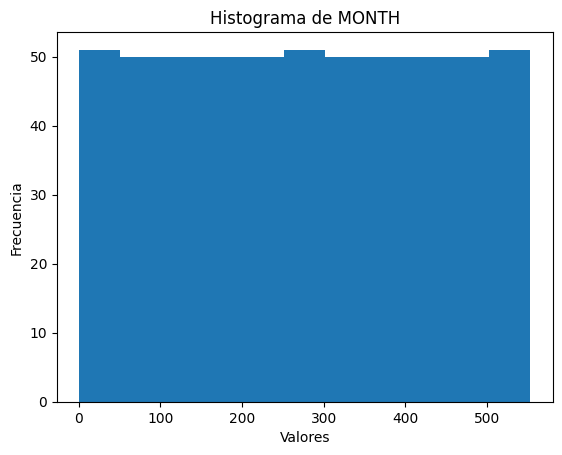

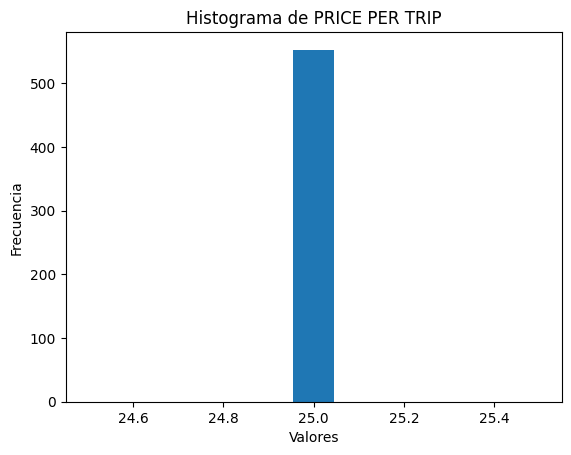

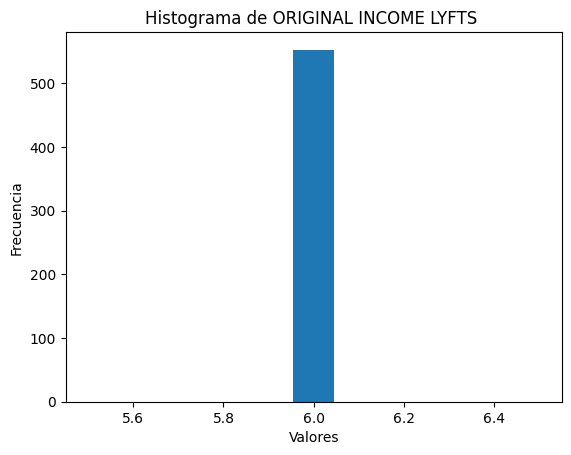

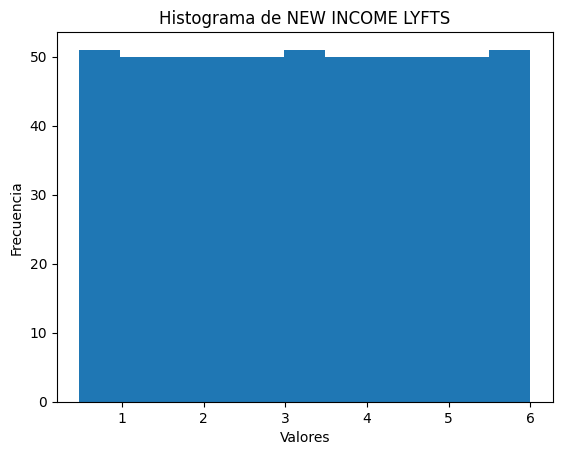

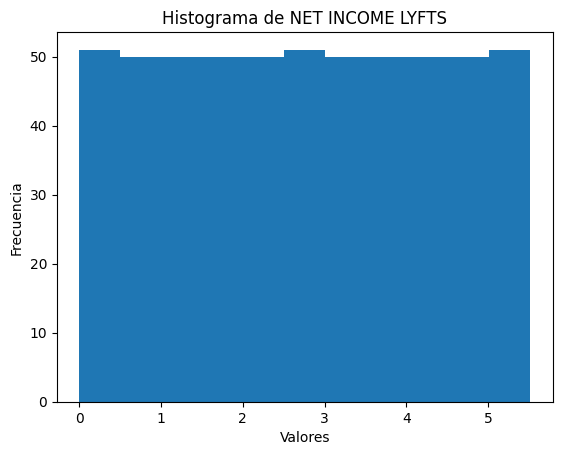

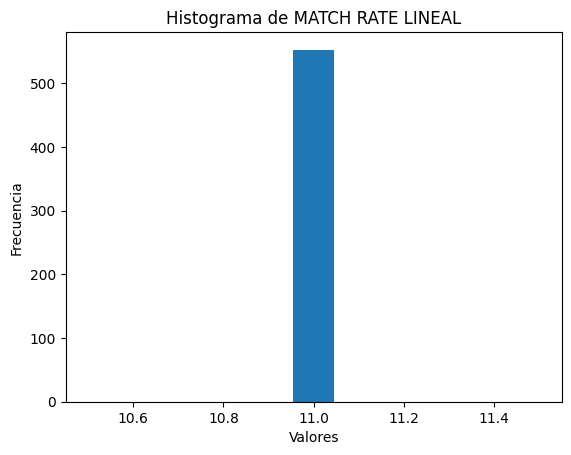

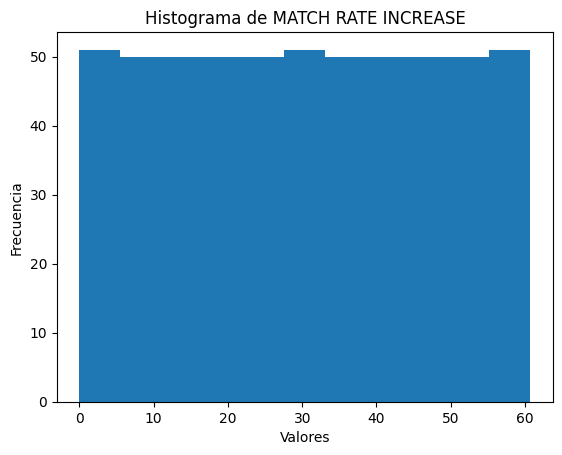

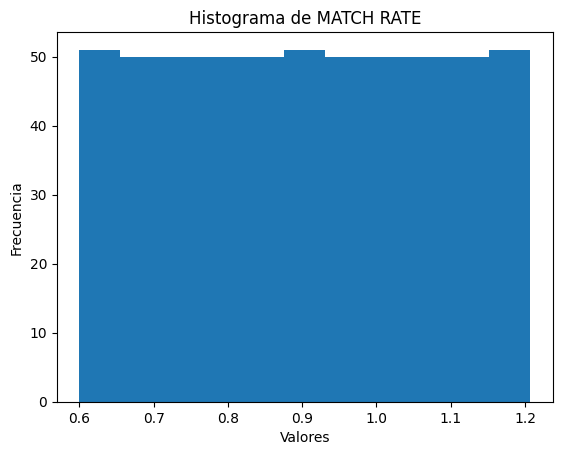

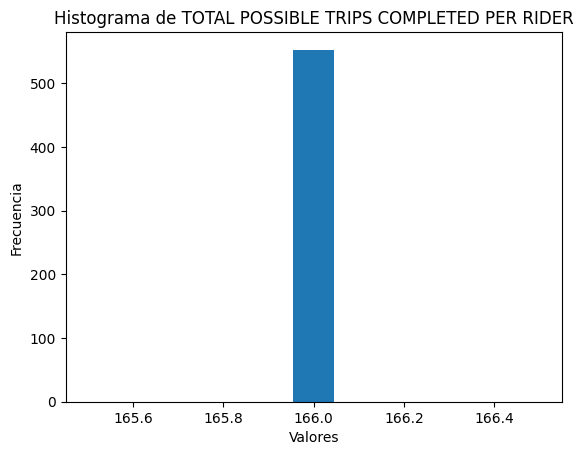

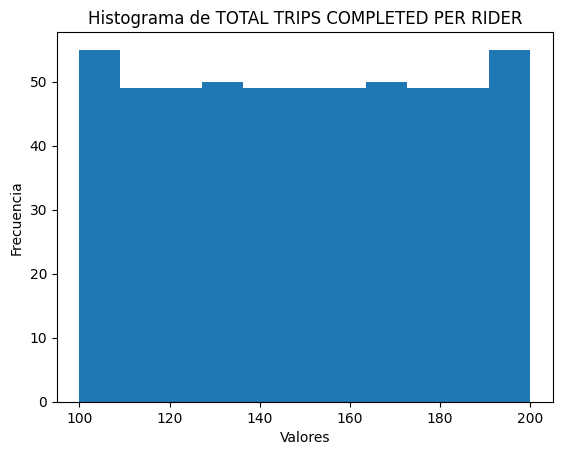

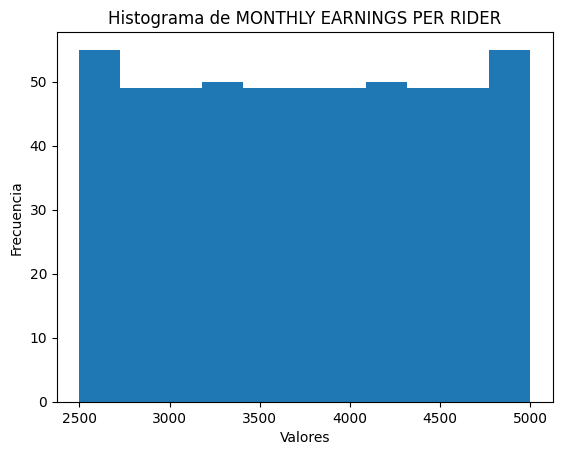

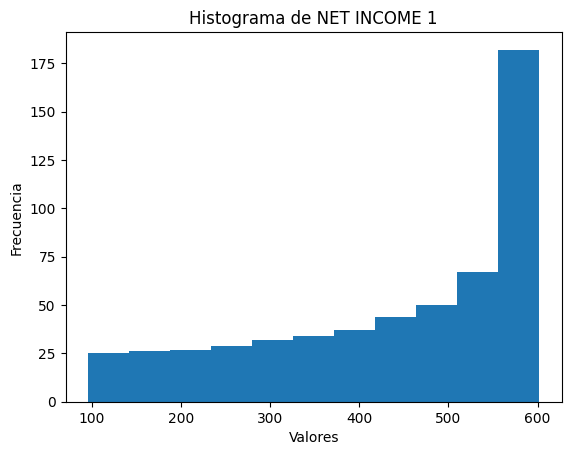

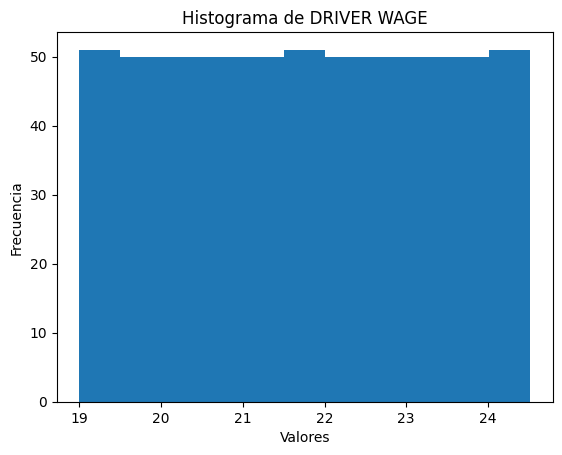

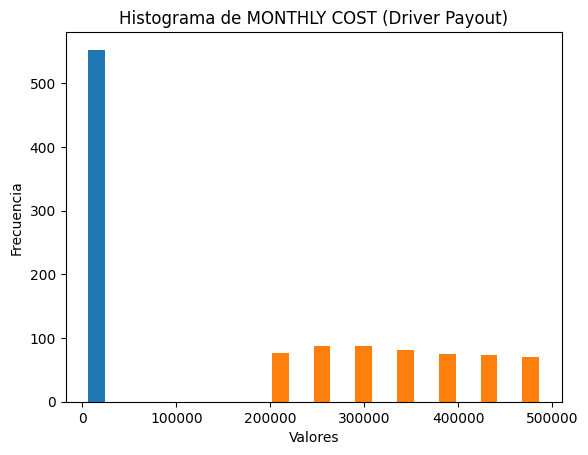

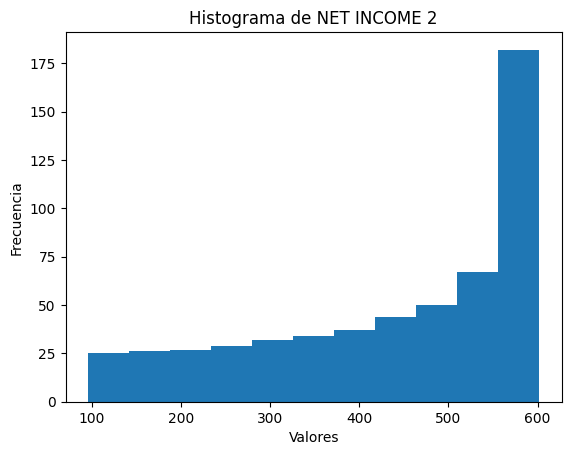

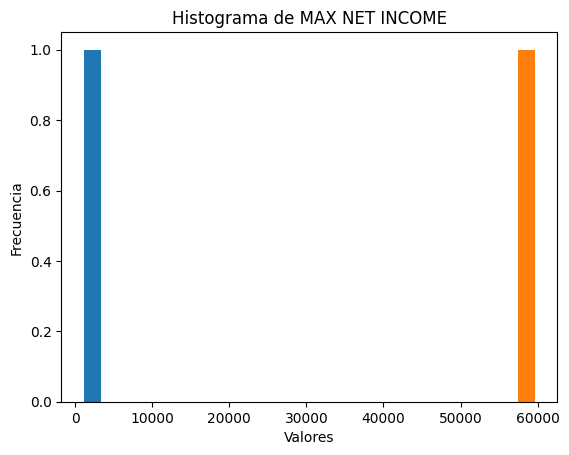

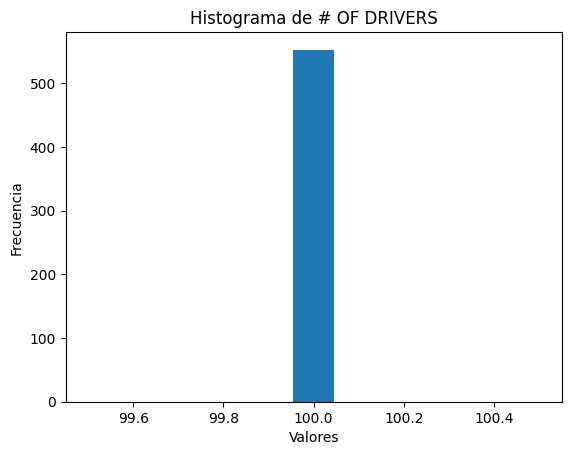

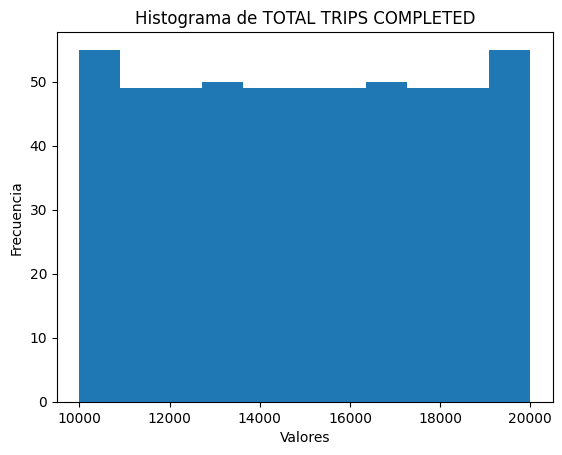

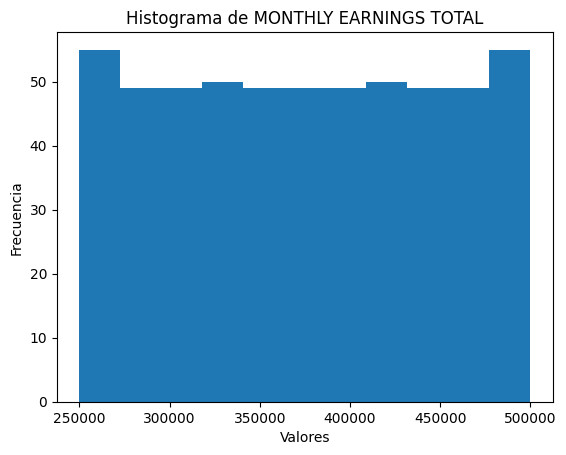

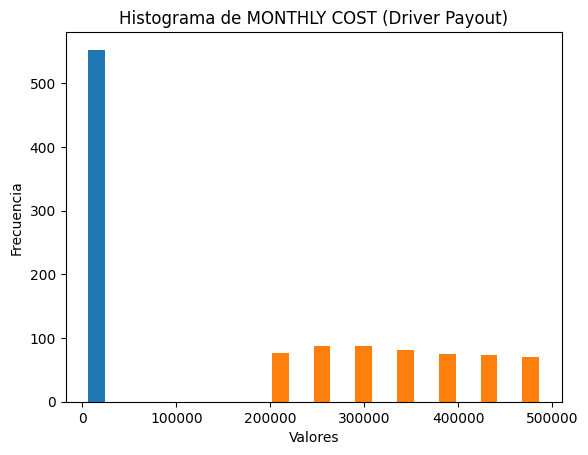

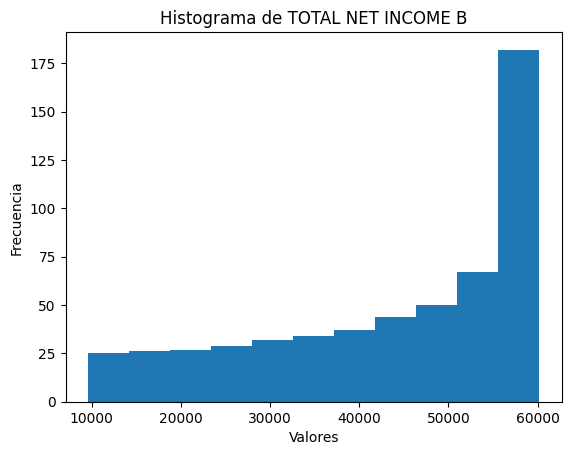

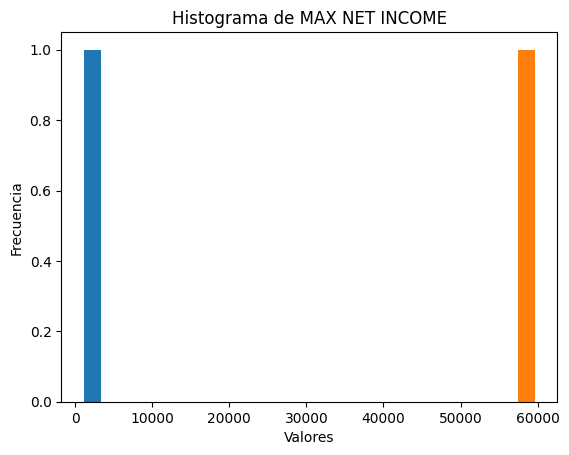

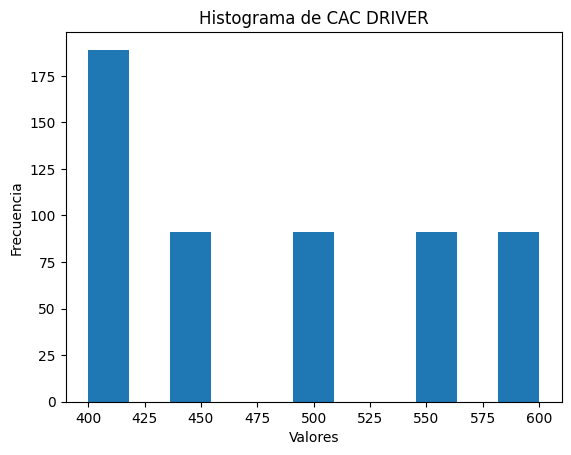

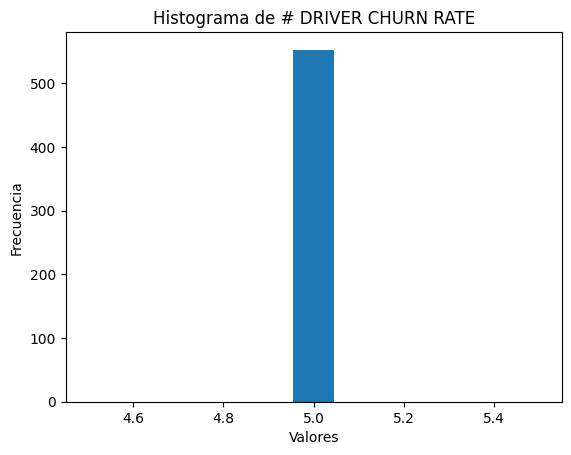

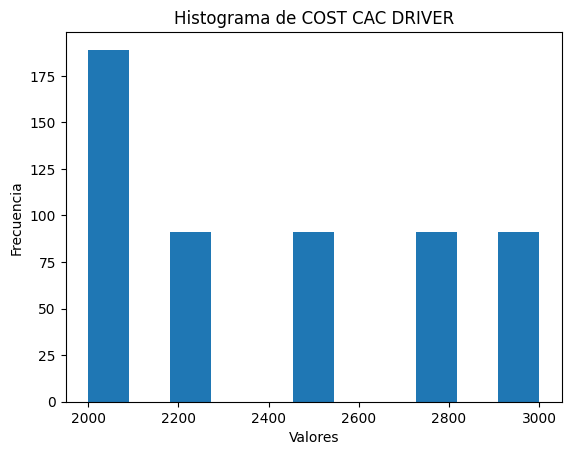

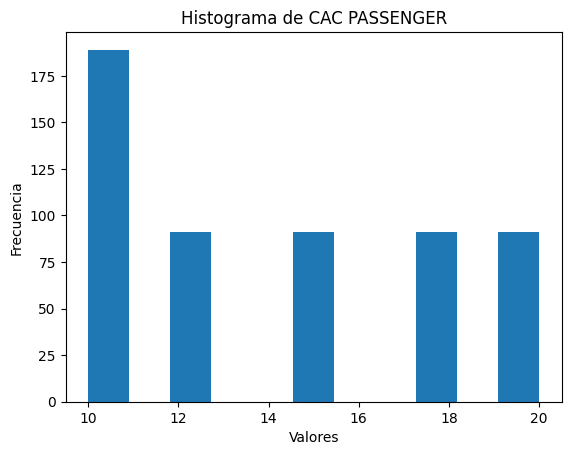

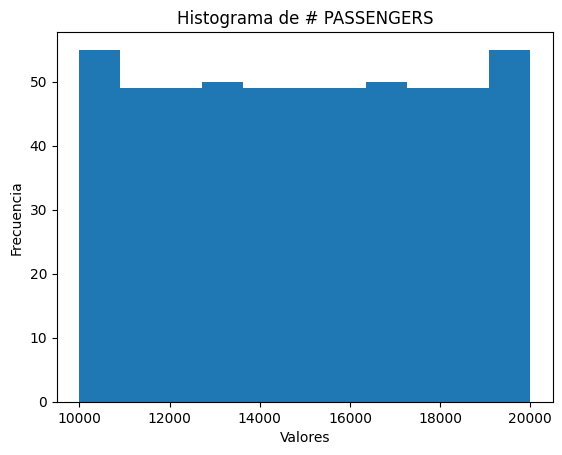

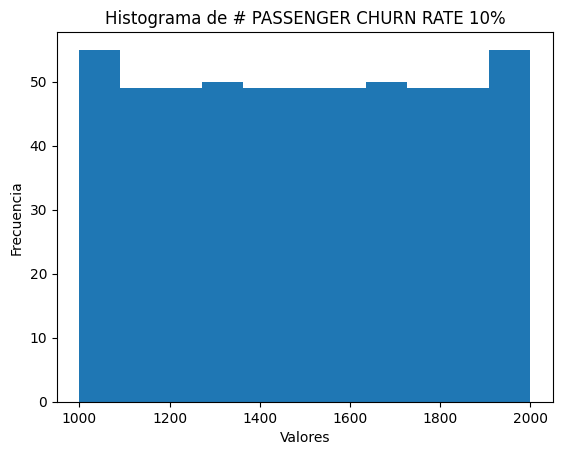

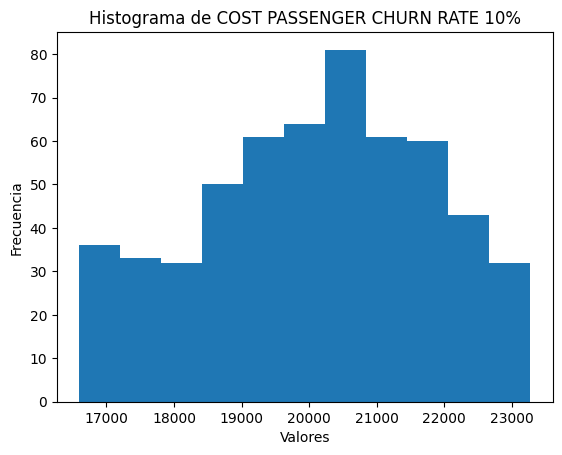

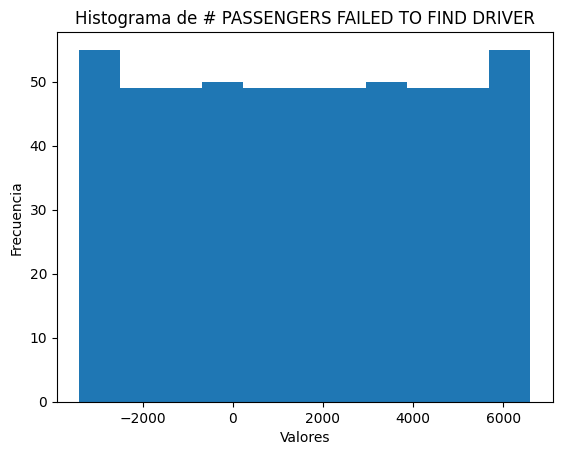

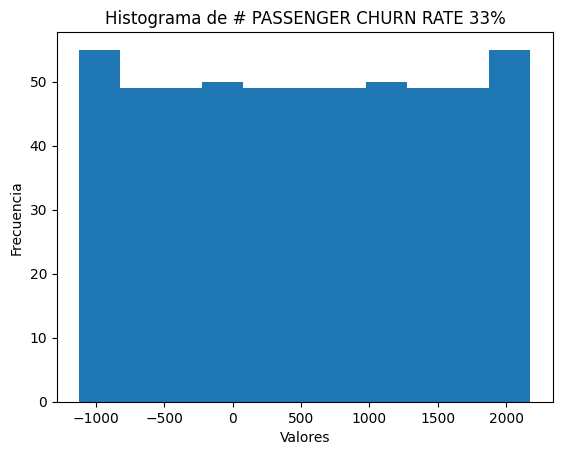

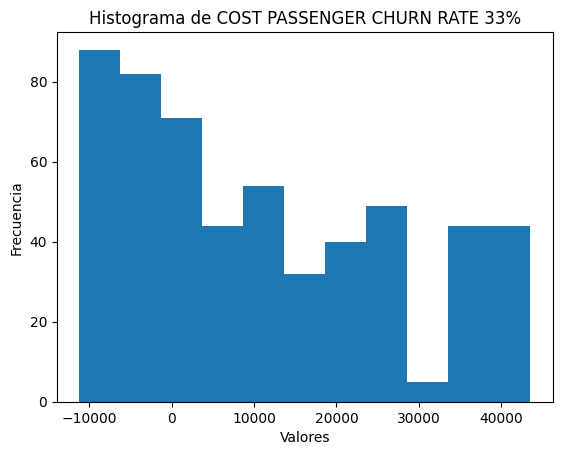

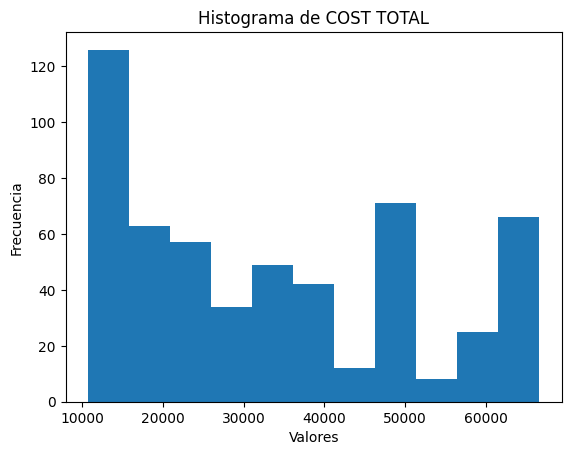

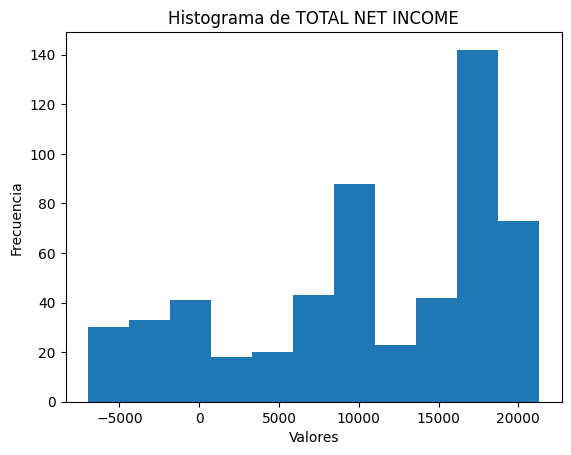

In [28]:
import matplotlib.pyplot as plt

# Supongamos que tienes un dataframe llamado 'df' con tus datos

# Itera sobre cada columna del dataframe y genera un histograma
for columna in datos.columns:
    plt.figure()  # Crea una nueva figura para cada histograma
    plt.hist(datos[columna], bins=k)  # Genera el histograma con 10 intervalos (puedes ajustarlo según tus necesidades)
    plt.title(f'Histograma de {columna}')  # Agrega el título del histograma
    plt.xlabel('Valores')  # Etiqueta del eje x
    plt.ylabel('Frecuencia')  # Etiqueta del eje y
    plt.show()  # Muestra el histograma
